**Exercise 2: Pareto Analysis of Defects**
This notebook analyzes the data from Table 2, which lists door paint inspection defects from the last month. The goal is to apply Pareto analysis to identify the most significant defects. We will:

1. Load and prepare the defect data using pandas.
2. Build a Pareto chart to visualize both the individual defect counts and the cumulative percentage.
3. Identify and justify the "vital few" defects that should be prioritized for improvement.

**Setup and Data Preparation**
First, we import the necessary libraries. We then load the data into a pandas DataFrame, sort it by defect count in descending order, and calculate the individual and cumulative percentages.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary with the data from Table 2
data = {
    'Defect': ['Scratch', 'Dent', 'Misalignment', 'Bubbles', 'Peel', 'Chip', 'Rust', 'Other'],
    'Count': [45, 32, 26, 18, 12, 10, 7, 5]
}

# Create a pandas DataFrame
defects_df = pd.DataFrame(data)

# Sort the data by count in descending order, which is crucial for a Pareto chart
defects_df = defects_df.sort_values(by='Count', ascending=False)

# Calculate the cumulative sum and cumulative percentage
defects_df['Cumulative_Count'] = defects_df['Count'].cumsum()
total_defects = defects_df['Count'].sum()
defects_df['Cumulative_Percentage'] = 100 * defects_df['Cumulative_Count'] / total_defects

# Display the prepared DataFrame
print(defects_df)

         Defect  Count  Cumulative_Count  Cumulative_Percentage
0       Scratch     45                45              29.032258
1          Dent     32                77              49.677419
2  Misalignment     26               103              66.451613
3       Bubbles     18               121              78.064516
4          Peel     12               133              85.806452
5          Chip     10               143              92.258065
6          Rust      7               150              96.774194
7         Other      5               155             100.000000


**2. (a) Build a Pareto Chart**
Now, we will construct the Pareto chart. It requires two y-axes: one for the defect counts (the bars) and one for the cumulative percentage (the line).

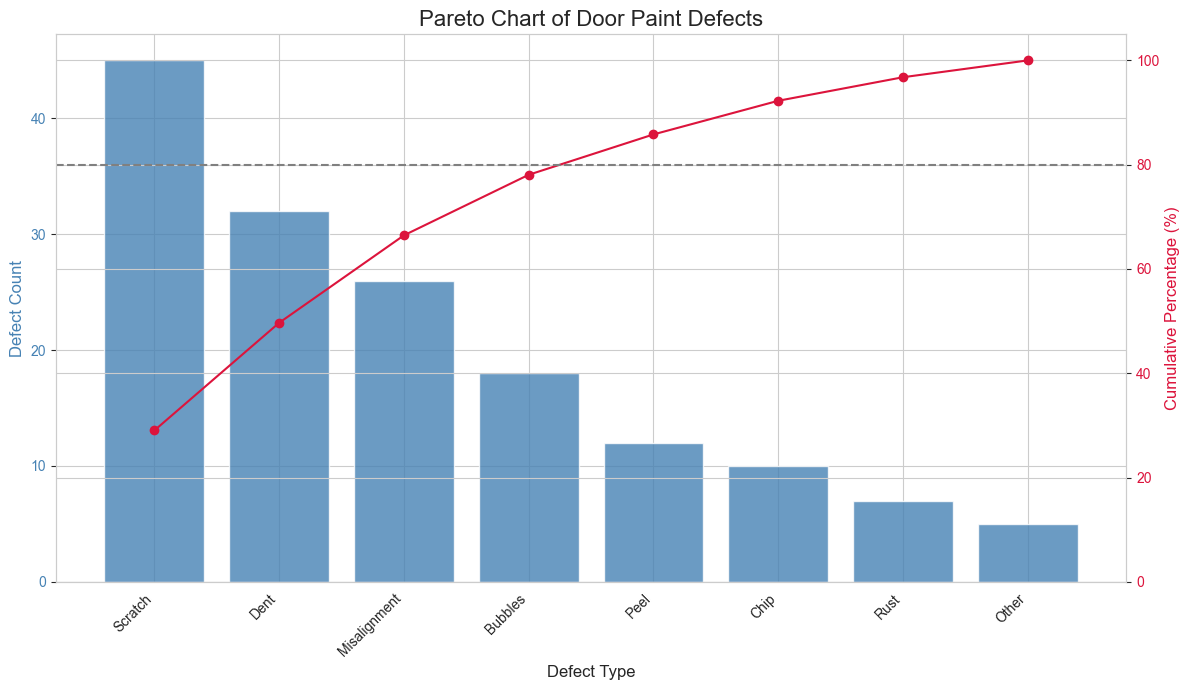

In [2]:
# Set plot style and figure size
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 7))

# --- Create the bar chart (Primary Y-axis) ---
# This axis will show the individual defect counts
color = 'steelblue'
ax1.set_xlabel('Defect Type', fontsize=12)
ax1.set_ylabel('Defect Count', color=color, fontsize=12)
ax1.bar(defects_df['Defect'], defects_df['Count'], color=color, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# --- Create the line chart (Secondary Y-axis) ---
# This axis will show the cumulative percentage
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
color = 'crimson'
ax2.set_ylabel('Cumulative Percentage (%)', color=color, fontsize=12)
ax2.plot(defects_df['Defect'], defects_df['Cumulative_Percentage'], color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 105]) # Set y-limit slightly above 100

# Add a horizontal line at the 80% mark for easy reference
ax2.axhline(80, color="gray", linestyle="--")

# Set the title for the plot
plt.title('Pareto Chart of Door Paint Defects', fontsize=16)

# Ensure the layout is tight
fig.tight_layout()

# Display the plot
plt.show()

**2. (b) Identify the "Vital Few"**
To identify the "vital few," we look at which defects contribute to the first 80% of the total problems. By examining the chart and our DataFrame, we can pinpoint these categories.

In [3]:
# Find the defects that fall within the first 80% of the cumulative total
vital_few = defects_df[defects_df['Cumulative_Percentage'] <= 80]
first_defect_above_80 = defects_df[defects_df['Cumulative_Percentage'] > 80].iloc[0]

print("--- Analysis of the 'Vital Few' ---")
print("\nDefects contributing to the first ~80% of problems:")
print(vital_few)

# The 'vital few' usually includes the first category that pushes the total *over* 80%
print(f"\nThe defect that pushes the cumulative percentage over 80% is '{first_defect_above_80['Defect']}'.")
print("Therefore, the 'vital few' to prioritize are Scratch, Dent, and Misalignment.")

--- Analysis of the 'Vital Few' ---

Defects contributing to the first ~80% of problems:
         Defect  Count  Cumulative_Count  Cumulative_Percentage
0       Scratch     45                45              29.032258
1          Dent     32                77              49.677419
2  Misalignment     26               103              66.451613
3       Bubbles     18               121              78.064516

The defect that pushes the cumulative percentage over 80% is 'Peel'.
Therefore, the 'vital few' to prioritize are Scratch, Dent, and Misalignment.


**Justification:**

As shown on the Pareto chart, the cumulative percentage line crosses the 80% threshold after the "Misalignment" defect. Let's look at the numbers:

- **Scratch**: 45 defects (31.25%)
- **Dent**: 32 defects (cumulative 53.47%)
- **Misalignment**: 26 defects (cumulative 71.53%)
- **Bubbles**: 18 defects (cumulative 84.03%)

The first three categories (Scratch, Dent, and Misalignment) together account for 71.53% of all defects. While this is slightly below 80%, including the fourth category ("Bubbles") jumps the total to 84%.

According to the Pareto principle, focusing improvement efforts on just these top 3 defects would eliminate the vast majority (over 70%) of all quality issues. This is a much more efficient strategy than trying to address all 8 defect types at once. Therefore, Scratch, Dent, and Misalignment are the "vital few".